<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/intro_geodataframe/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

The most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. In GitHub (cloud), create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to **Paidea** and download three compressed files from the folder **WorldMaps**.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os, geopandas as gpd
# drive_path = "maps"
# folder_name = "World_Countries"
# file_name = "World_Countries.shp"
# file_path = os.path.join(drive_path, folder_name, file_name)

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
# countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [ ]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# dimensions
countries.shape

(252, 2)

In [ ]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
# some content
countries.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

In [ ]:
countries.crs       # muestra info sobre el sistema de coordenadas de referencias (CRS)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [ ]:
# any missing values?
countries[countries.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [COUNTRY, geometry]
Index: []

In [ ]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, those pandas commands are working fine, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

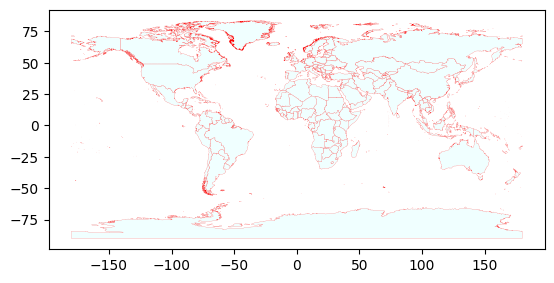

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [ ]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [ ]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()          # GDF rivers tiene geometría linea y GDF cities tiene geometrí puntos}
                                                              # revisar diferencia entre LINESTING y MULTISTRING

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

This is the rivers map:

In [ ]:
rivers

NAME  SYSTEM  \
0                       Aldan    Lena   
1                      Amazon  Amazon   
2                   Amu Darya    None   
3                        Amur    None   
4                      Angara    None   
..                        ...     ...   
93                    Yangtze    None   
94                    Yenisey    None   
95                      Yukon    None   
96                    Zambezi    None   
97  Rio Grande, South America  Parana   

                                             geometry  
0   LINESTRING (124.00678 56.47258, 123.25956 56.6...  
1   MULTILINESTRING ((-61.2773 -3.60706, -60.68466...  
2   LINESTRING (73.98818 37.49952, 73.52595 37.528...  
3   LINESTRING (122.63956 49.9973, 120.47874 49.25...  
4   LINESTRING (105.07841 51.93053, 103.92959 51.7...  
..                                                ...  
93  MULTILINESTRING ((119.82609 32.24864, 118.9707...  
94  MULTILINESTRING ((98.94706 52.57675, 98.12095 ...  
95  LINESTRING (-130.89319 59.2448, -131.0657 59.1...  
96  MULTILINESTRING ((35.52866 -17.66773, 36.28055...  
97  LINESTRING (-44.37152 -22.17241, -43.86097 -21...  

[98 rows x 3 columns]

<Axes: >

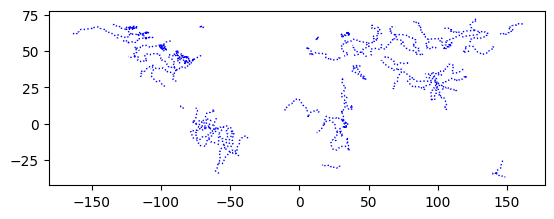

In [ ]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

In [ ]:
cities[cities.isnull().any(axis=1)]     # no hay ninguna fila con algun valor nulo

Empty GeoDataFrame
Columns: [NAME, COUNTRY, CAPITAL, geometry]
Index: []

<Axes: >

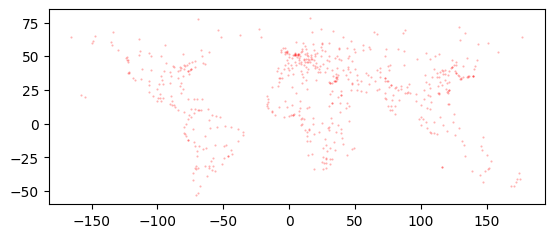

In [ ]:
cities.plot(marker='.', # marker type, significaa small circular points
            color='red',
            markersize=1,
            alpha=0.3) # transparency, 30% de opacidad

You can start by creating the layer on the back (the base), and add layers on top:

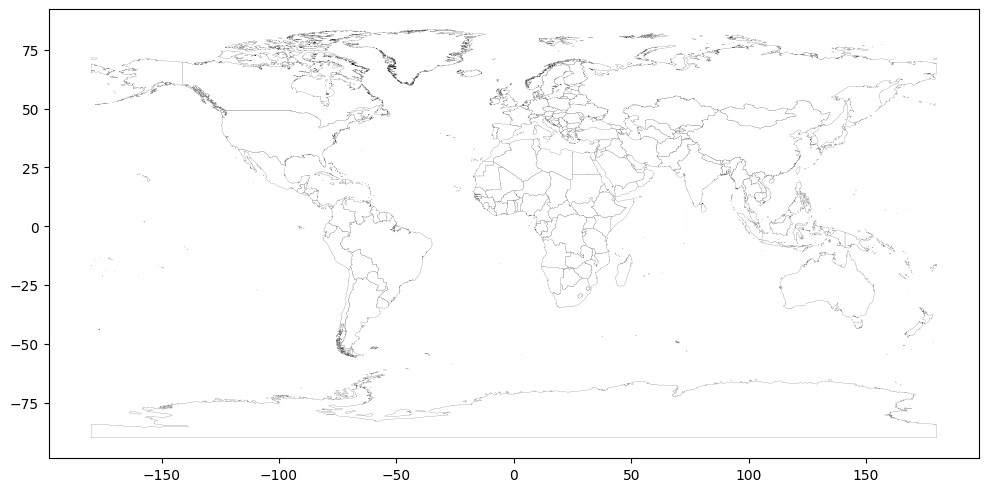

In [ ]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

<Axes: >

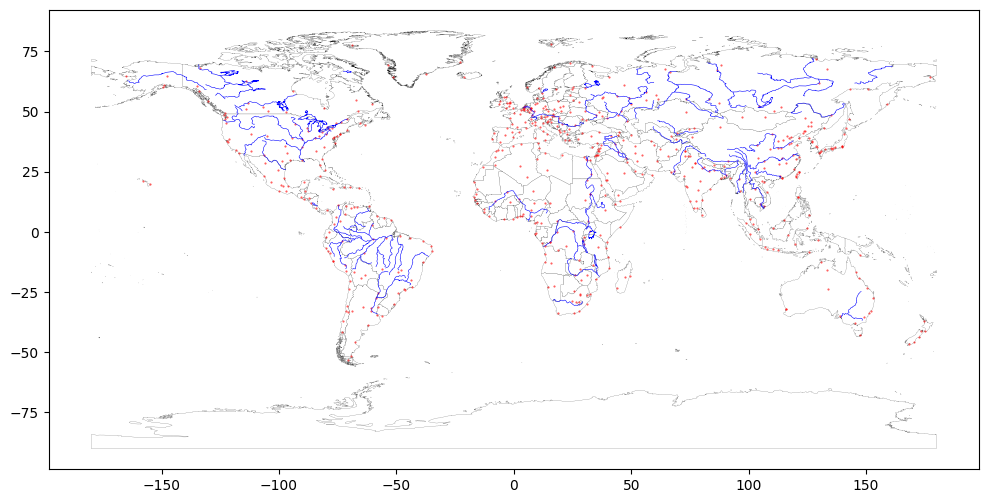

In [ ]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


Saving into a different format (not shapefile):

In [ ]:
# ONE file - SEVERAL layers
import os           # OJO me parece que aquí esta linea no importa porque no se obtienen los archivos del
                    # sistema operativo, sino desde el link de Drive

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")


# Map Projection

The CRS is a very important property of the maps. They affect three some aspects:

* shape
* area
* scale
* direction

Most maps come with a default CRS: 4326. Pay attention:

In [ ]:
brazil=countries[countries.COUNTRY=='Brazil']

In [ ]:
brazil.crs              # OJO con CRS EPSG 4326, qué significa??????

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
brazil

COUNTRY                                           geometry
29  Brazil  MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...

In [ ]:
# check units of measurement
brazil.crs.axis_info        # muestra que las unidades son degrees

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
# is this CRS projected?
brazil.crs.is_projected         # menciona que Brazil NO está proyecto, esto qué quiere decir???

False

Polygons have a centroid. When we try getting a centroid from an **unprojected** polygon, you get:

In [ ]:
# centroid
brazil.centroid         # menos mal en este caso, colab advierte que es mejor calcular el centroide con un polygon proyectado

<ipython-input-79-f988fb17678c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid         # menos mal en este caso, colab advierte que es mejor calcular el centroide con un polygon proyectado


29    POINT (-53.09009 -10.77302)
dtype: geometry

## Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [ ]:
# recommended for Brazil (meters)               #ahora las unidades están en metros
brazil.to_crs(5641).crs.axis_info               #buscar el CRS mas conveniente para cada pais

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
brazil.crs.is_projected       # luego de hacer la proyección, por qué todavía aparece como si fuera NO proyectado????
                              #supongo que es porque no se ha chancado en la variable "brazil"

False

In [ ]:
# now this works with no warning                        #raro porque no aparece warning porque está proyecto, sin embargo, el comando anterior me dice que NO está proyectado
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

In [ ]:
brazil.to_crs(5641)   #esto tambien es un geodataframe, al igual que solo "brazil"

COUNTRY                                           geometry
29  Brazil  MULTIPOLYGON (((1926257.542 8894978.397, 19262...

<Axes: >

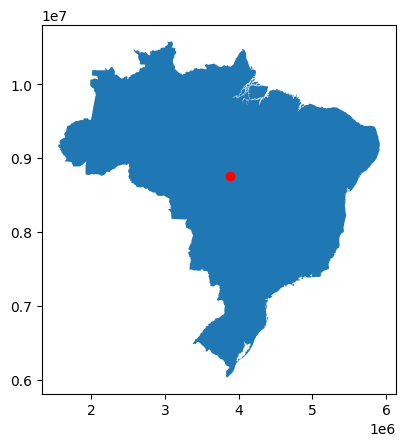

In [ ]:
# replotting:

base5641=brazil.to_crs(5641).plot()     #el ax object es el plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

Let's keep the projected version for all our maps:

In [ ]:
cities_brazil_5641=cities[cities.COUNTRY=='Brazil'].to_crs(5641)      # se hace la reproyeccion
                                                                      # para todos las ciudades de
                                                                      # BRAZIL con su mismo CRS
cities_brazil_5641          #ahora esto es un gdf con las ciudades reproyectadas

NAME COUNTRY CAPITAL                          geometry
261       Fortaleza  Brazil       N   POINT (5490744.108 9581606.841)
266          Recife  Brazil       N   POINT (5899513.699 9103509.496)
268        Brasilia  Brazil       Y   POINT (4455115.202 8232032.096)
271         Goiania  Brazil       N   POINT (4304139.018 8124392.219)
274  Belo Horizonte  Brazil       N   POINT (4898864.129 7760385.851)
275  Rio de Janeiro  Brazil       N   POINT (4949360.554 7419677.775)
276       Sao Paulo  Brazil       N   POINT (4596944.864 7316241.618)
277          Santos  Brazil       N    POINT (4631811.736 7271105.36)
279        Curitiba  Brazil       N   POINT (4300835.117 7091391.042)
285    Porto Alegre  Brazil       N   POINT (4086843.757 6514863.904)
318           Belem  Brazil       N   POINT (4408552.902 9822575.788)
338     Porto Velho  Brazil       N   POINT (2674830.281 9029229.488)
340          Cuiaba  Brazil       N   POINT (3548159.769 8259833.479)
380          Manaus  Brazil       N   POINT (3107087.489 9654789.116)
381        Santarem  Brazil       N   POINT (3708362.685 9728067.193)
421       Boa Vista  Brazil       N  POINT (3053087.698 10304013.569)
447           Natal  Brazil       N   POINT (5862204.019 9360166.734)
466        Sao Luis  Brazil       N   POINT (4840903.052 9723642.703)
568        Salvador  Brazil       N   POINT (5502859.685 8596066.482)

In [ ]:
riversBrazil_clipped=gpd.clip(rivers,brazil)  #corta a los rios tales que están dentro de Brazil

In [ ]:
brazil_5641=brazil.to_crs(5641)     #se hace el reseteo de crs al pais brazil

rivers_brazil_5641=riversBrazil_clipped.to_crs(brazil_5641.crs)   #brazil_5641.crs==5641

In [ ]:
## saving

import os

brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")
brazil_5641.centroid.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='centroid', driver="GPKG")

Hasta ahora hemos hecho las reproyecciones correspondientes, pero CREO que aun no hemos llamado al archivo .gpkg

### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

In [ ]:
canada=countries[countries.COUNTRY=='Canada']
canada

COUNTRY                                           geometry
35  Canada  MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ...

In [ ]:
canada.crs.axis_info  # se observan unidades degrees

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
canada.crs.is_projected # no está proyectado

False

In [ ]:
canada_3348=canada.to_crs(3348)
canada_3348.crs.axis_info #está proyectado porque unidades son metros

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
canada_3348.centroid

35    POINT (5972150.368 2686371.781)
dtype: geometry

<Axes: >

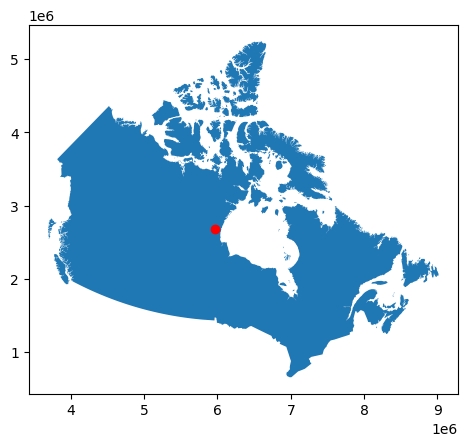

In [ ]:
base3348=canada.to_crs(3348).plot()
canada_3348.centroid.plot(color='red',ax=base3348)

In [ ]:
cities_canada_3348=cities[cities.COUNTRY=='Canada'].to_crs(3348)  #se reproyectan las ciudades de Canada

In [ ]:
riversCanada_clipped=gpd.clip(rivers,canada)  #se cortan los rios que estan dentro de Canada
rivers_canada_3348=riversCanada_clipped.to_crs(3348)  #se reproyectan los rios dentro de Canada

<Axes: >

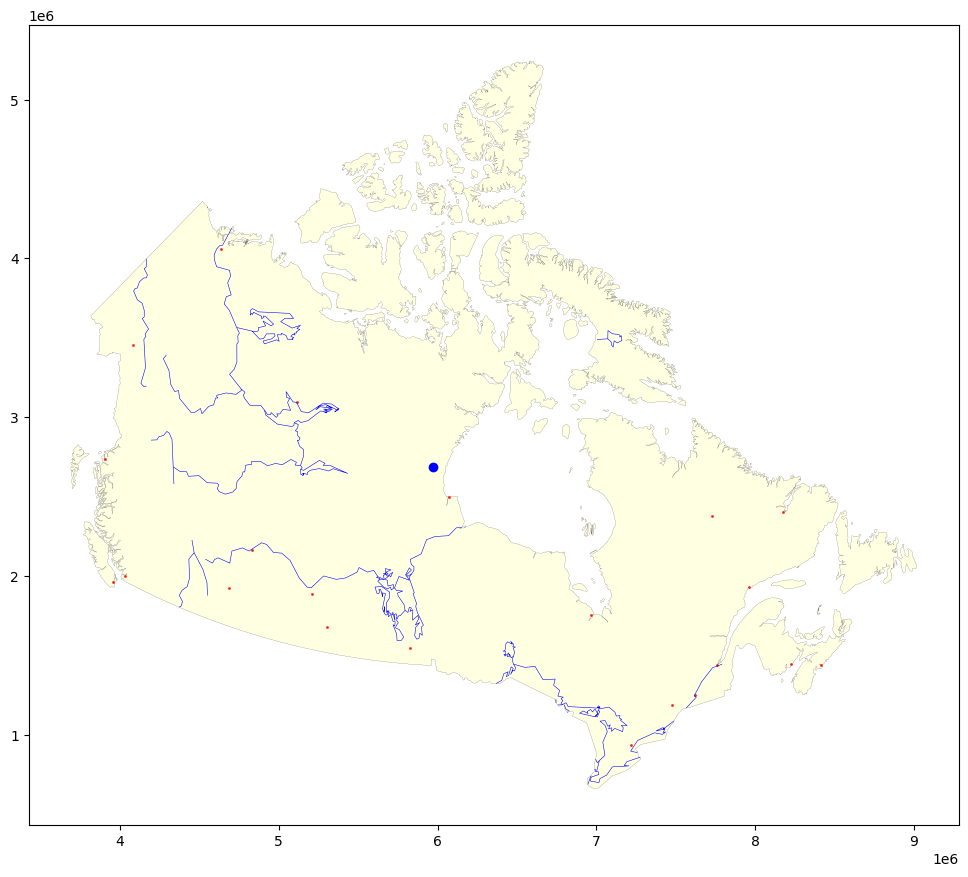

In [ ]:
# se plotea Canada, sus rios y ciudades en un solo grafico como 3 layers diferentes
baseCanada= canada_3348.plot(facecolor="#ffffe2",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers_canada_3348.plot(edgecolor='blue', linewidth=0.4,
            ax=baseCanada)
cities_canada_3348.plot(marker='.', color='red', markersize=5,alpha=0.7,
            ax=baseCanada)
canada_3348.centroid.plot(color='blue',ax=baseCanada)

In [ ]:
import os

canada_3348.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='country', driver="GPKG")
cities_canada_3348.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='cities', driver="GPKG")
rivers_canada_3348.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='rivers', driver="GPKG")
canada_3348.centroid.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='centroid', driver="GPKG")

## Creating Spatial data

You have a "data"folder in **Paideia** with a  file with information on the airports in Brazil. Create a similar 'data' folder in your local computer, inside the current _repo_.

Let's open the **CSV**:

In [ ]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("maps","br-airports.csv"))

# some rows

# infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


This needs some **CLEANING**:

In [ ]:
# bye first row     elimina la 1ra fila porque contenía informacion irrelevante
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

id ident            type  \
0  5910  SBGR   large_airport   
1  5906  SBGL   large_airport   
2  5974  SBSP  medium_airport   
3  5967  SBRJ  medium_airport   
4  5872  SBBR   large_airport   

                                                name latitude_deg  \
0  Guarulhos - Governador André Franco Montoro In...   -23.431944   
1       Rio Galeão – Tom Jobim International Airport   -22.809999   
2                                  Congonhas Airport   -23.627657   
3                              Santos Dumont Airport     -22.9105   
4  Presidente Juscelino Kubitschek International ...   -15.869167   

  longitude_deg elevation_ft continent country_name iso_country  ...  \
0    -46.467778         2461        SA       Brazil          BR  ...   
1    -43.250557           28        SA       Brazil          BR  ...   
2    -46.654601         2631        SA       Brazil          BR  ...   
3    -43.163101           11        SA       Brazil          BR  ...   
4    -47.920834         3497        SA       Brazil          BR  ...   

     municipality scheduled_service gps_code iata_code local_code  \
0       São Paulo                 1     SBGR       GRU     SP0002   
1  Rio De Janeiro                 1     SBGL       GIG     RJ0001   
2       São Paulo                 1     SBSP       CGH     SP0001   
3  Rio de Janeiro                 1     SBRJ       SDU     RJ0002   
4        Brasília                 1     SBBR       BSB     DF0001   

                                           home_link  \
0                 http://www.aeroportoguarulhos.net/   
1                                                NaN   
2  http://www.infraero.gov.br/usa/aero_prev_home....   
3  https://www4.infraero.gov.br/aeroportos/aeropo...   
4  http://www.infraero.gov.br/usa/aero_prev_home....   

                                      wikipedia_link  \
0  https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...   
1  https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...   
2  https://en.wikipedia.org/wiki/Congonhas-S%C3%A...   
3  https://en.wikipedia.org/wiki/Santos_Dumont_Ai...   
4  https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...   

                                            keywords    score  \
0                                            Cumbica  1016675   
1  Galeão - Antônio Carlos Jobim International Ai...    51475   
2  http://www.infraero.gov.br/usa/aero_prev_home....      750   
3                                                RIO      750   
4                                                NaN    51275   

                last_updated  
0  2021-10-28T15:52:55+00:00  
1  2021-10-14T18:09:35+00:00  
2  2022-05-03T20:10:35+00:00  
3  2022-03-28T23:27:00+00:00  
4  2020-08-24T11:15:12+00:00  

[5 rows x 23 columns]

In [ ]:
# keep the  columns needed

infoairports["region_name"].unique()


array(['São Paulo', 'Rio de Janeiro', 'Distrito Federal', 'Bahia',
       'Rio Grande do Sul', 'Pernambuco', 'Paraná', 'Minas Gerais',
       'Ceará', 'Amazonas', 'Santa Catarina', 'Mato Grosso do Sul',
       'Pará', 'Mato Grosso', 'Goiás', 'Espírito Santo',
       'Rio Grande do Norte', 'Maranhão', 'Tocantins', 'Roraima',
       'Alagoas', 'Paraíba', 'Amapá', 'Acre', 'Sergipe', 'Rondônia',
       'Piauí', '(unassigned)'], dtype=object)

In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6671 non-null   object
 1   type           6671 non-null   object
 2   latitude_deg   6671 non-null   object
 3   longitude_deg  6671 non-null   object
 4   elevation_ft   6500 non-null   object
 5   region_name    6671 non-null   object
 6   municipality   6647 non-null   object
dtypes: object(7)
memory usage: 364.9+ KB


Some **FORMATTING**:

In [ ]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [ ]:
# now
infoairports.info()         # todavia hay missing values, no se deberían de eliminar?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6671 non-null   object 
 1   type           6671 non-null   object 
 2   latitude_deg   6671 non-null   float64
 3   longitude_deg  6671 non-null   float64
 4   elevation_ft   6500 non-null   float64
 5   region_name    6671 non-null   object 
 6   municipality   6647 non-null   object 
dtypes: float64(3), object(4)
memory usage: 364.9+ KB


In [ ]:
brazil_5641.crs.is_projected        # pero sí está proyectado o no????

True

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

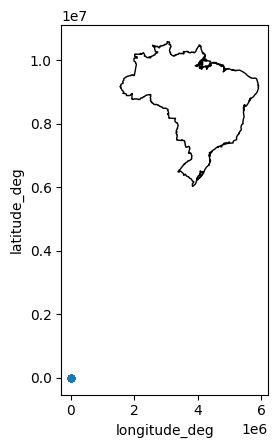

In [ ]:
# let's plot

base = brazil_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)
# quizás esto es lo que no está proyectado

Why is it wrong?

<Axes: >

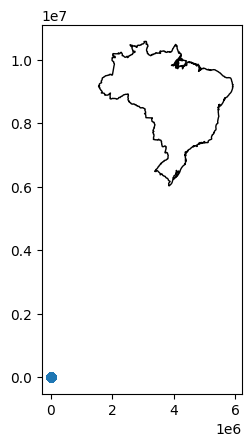

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),geometry=gpd.points_from_xy(infoairports.longitude_deg,infoairports.latitude_deg),crs=brazil.crs.to_epsg())
# the coordinates were in degrees - unprojected

# let's plot

base = brazil_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [ ]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Let's re project!

<Axes: >

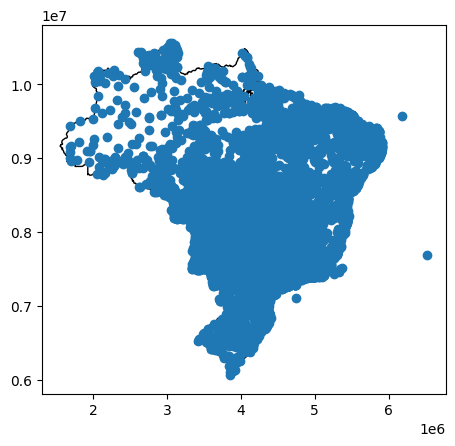

In [ ]:
airports_5641=airports.to_crs(5641)     # se reproyectan los puntos de los aeropuertos a CRS 5641 y se plotean

## then

base = brazil_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)                                                 # codigo del profe
# airports_5641.plot(marker='.', color='red', markersize=1,alpha=0.7, ax=base)  # mi codigo

Remember you have type of airports:

In [ ]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()
                                    # el nombre de la columna del GDF "type" no es conveniente por lo que no se puede usar

type
small_airport     4587
heliport          1699
closed             251
medium_airport     124
large_airport        8
seaplane_base        2
Name: count, dtype: int64

We may use that in the future. For now, just rename the **type** column to a different one.

In [ ]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='airports', driver="GPKG")

In [ ]:
airports_5641[airports_5641.name.str.contains("Planura")]

name           kind  latitude_deg  longitude_deg  \
949    Fazenda Planura Airport  small_airport     -3.593611     -59.652222   
4049  Fazenda Planura Airstrip  small_airport     -8.957500     -50.104167   
5679                   Planura         closed    -20.124399     -48.699699   

      elevation_ft   region_name               municipality  \
949          188.0      Amazonas                    Autazes   
4049         673.0          Pará  Santa Maria das Barreiras   
5679           NaN  Minas Gerais                        NaN   

                             geometry  
949   POINT (3147404.844 9602615.396)  
4049  POINT (4209646.279 9006018.993)  
5679  POINT (4365896.293 7728296.307)

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

In [ ]:
import pandas as pd
allAirports=pd.read_csv(os.path.join("maps","airports.csv"))

In [ ]:
canadaAirports=allAirports[allAirports.iso_country=='CA']   #se filtra allAirports para quedarnos solo con los aeropuertos de Canada
                                                            #nos quedamos con las columns que importan

In [ ]:
canadaAirports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','iso_region','municipality']
canadaAirports=canadaAirports.loc[:,keep]

canadaAirports

# falta agregar columna "region_name", supongo que es con merge o algo similar

name           type  latitude_deg  longitude_deg  \
16294       Lac-des-Loups Airport         closed     46.982201     -76.482498   
16295  Pourvoirie Joncas Airstrip  small_airport     47.105400     -77.631104   
16296       RCAF Station Buttress         closed     50.236099    -105.547997   
16297         RCAF Station Aylmer         closed     42.805901     -80.944199   
16298   RCAF Station Lincoln Park         closed     51.009399    -114.133003   
...                           ...            ...           ...            ...   
81583           Opinaca Aerodrome  small_airport     52.221944     -76.611944   
81699   April Point Seaplane Base  seaplane_base     50.065000    -125.235000   
81721   Refuge Cove Seaplane Base  seaplane_base     50.123400    -124.843000   
81723          Dean River Airport  small_airport     52.823710    -126.964957   
82861        Namu Water Aerodrome  seaplane_base     51.862825    -127.869357   

       elevation_ft iso_region      municipality  
16294           NaN      CA-QC     Lac-des-Loups  
16295           NaN      CA-QC      Saint-Lazare  
16296           NaN      CA-SK         Moose Jaw  
16297           NaN      CA-ON            Aylmer  
16298           NaN      CA-AB           Calgary  
...             ...        ...               ...  
81583         692.0      CA-QC     Éléonore Mine  
81699           NaN      CA-BC     Quadra Island  
81721           0.0      CA-BC  Desolation Sound  
81723          62.0      CA-BC   Kimsquit Valley  
82861           0.0      CA-BC              Namu  

[3287 rows x 7 columns]

In [ ]:
#se crea un diccionario para cambiar los iso_region por las regiones
mapeo_regiones={
    "CA-QC":"Quebec",
    "CA-ON":"Ontario",
    "CA-BC":"British Columbia",
    "CA-AB":"Alberta",
    "CA-MB":"Manitoba",
    "CA-SK":"Saskatchewan",
    "CA-NB":"New Brunswick",
    "CA-NS":"Nova Scotia",
    "CA-PE":"Prince Edward Island",
    "CA-NL":"Newfoundland and Labrador",
    "CA-NT":"Northwest Territories",
    "CA-YT":"Yukon",
    "CA-NU":"Nunavut",
    "CA-U-A":"(unassigned)"
}
canadaAirports['iso_region'] = canadaAirports['iso_region'].replace(mapeo_regiones)
canadaAirports.rename(columns={'iso_region':'region_name'},inplace=True)

In [ ]:
canadaAirports    #se observa que latitude, longitude y elevation ya están como datos numéricos, OK

name           type  latitude_deg  longitude_deg  \
16294       Lac-des-Loups Airport         closed     46.982201     -76.482498   
16295  Pourvoirie Joncas Airstrip  small_airport     47.105400     -77.631104   
16296       RCAF Station Buttress         closed     50.236099    -105.547997   
16297         RCAF Station Aylmer         closed     42.805901     -80.944199   
16298   RCAF Station Lincoln Park         closed     51.009399    -114.133003   
...                           ...            ...           ...            ...   
81583           Opinaca Aerodrome  small_airport     52.221944     -76.611944   
81699   April Point Seaplane Base  seaplane_base     50.065000    -125.235000   
81721   Refuge Cove Seaplane Base  seaplane_base     50.123400    -124.843000   
81723          Dean River Airport  small_airport     52.823710    -126.964957   
82861        Namu Water Aerodrome  seaplane_base     51.862825    -127.869357   

       elevation_ft       region_name      municipality  
16294           NaN            Quebec     Lac-des-Loups  
16295           NaN            Quebec      Saint-Lazare  
16296           NaN      Saskatchewan         Moose Jaw  
16297           NaN           Ontario            Aylmer  
16298           NaN           Alberta           Calgary  
...             ...               ...               ...  
81583         692.0            Quebec     Éléonore Mine  
81699           NaN  British Columbia     Quadra Island  
81721           0.0  British Columbia  Desolation Sound  
81723          62.0  British Columbia   Kimsquit Valley  
82861           0.0  British Columbia              Namu  

[3287 rows x 7 columns]

In [ ]:
#reseteo de indices
canadaAirports.reset_index(drop=True, inplace=True)

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

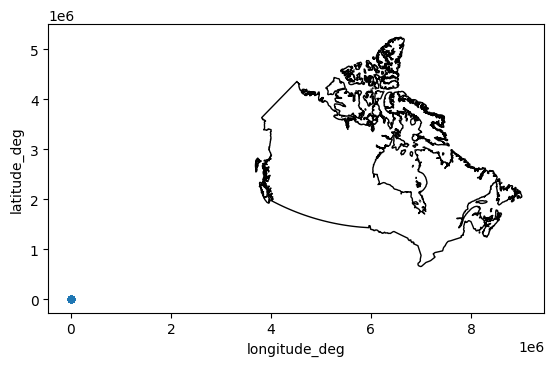

In [ ]:
# let's plot

base1 = canada_3348.plot(color='white', edgecolor='black')

canadaAirports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base1)

In [ ]:
canadaAirportsGDF=gpd.GeoDataFrame(data=canadaAirports.copy(),geometry=gpd.points_from_xy(canadaAirports.longitude_deg,canadaAirports.latitude_deg),crs=canada.crs.to_epsg())


In [ ]:
canadaAirports_3348=canadaAirportsGDF.to_crs(3348)

<Axes: >

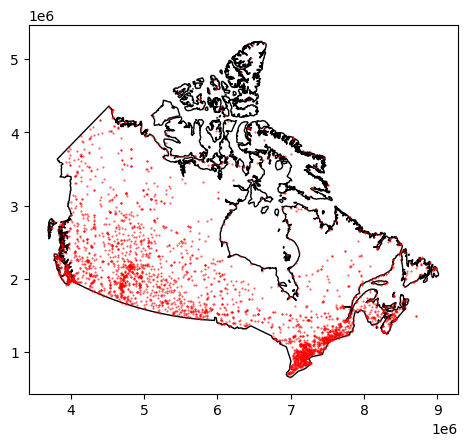

In [ ]:
base2 = canada_3348.plot(color='white', edgecolor='black')
# canadaAirports_3348.plot(ax=base2)
canadaAirports_3348.plot(marker='.', color='red', markersize=1,alpha=0.7, ax=base2)

In [ ]:
canadaAirports_3348.rename(columns={'type':'kind'},inplace=True)

In [ ]:
canadaAirports_3348.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='airports', driver="GPKG")

<Axes: >

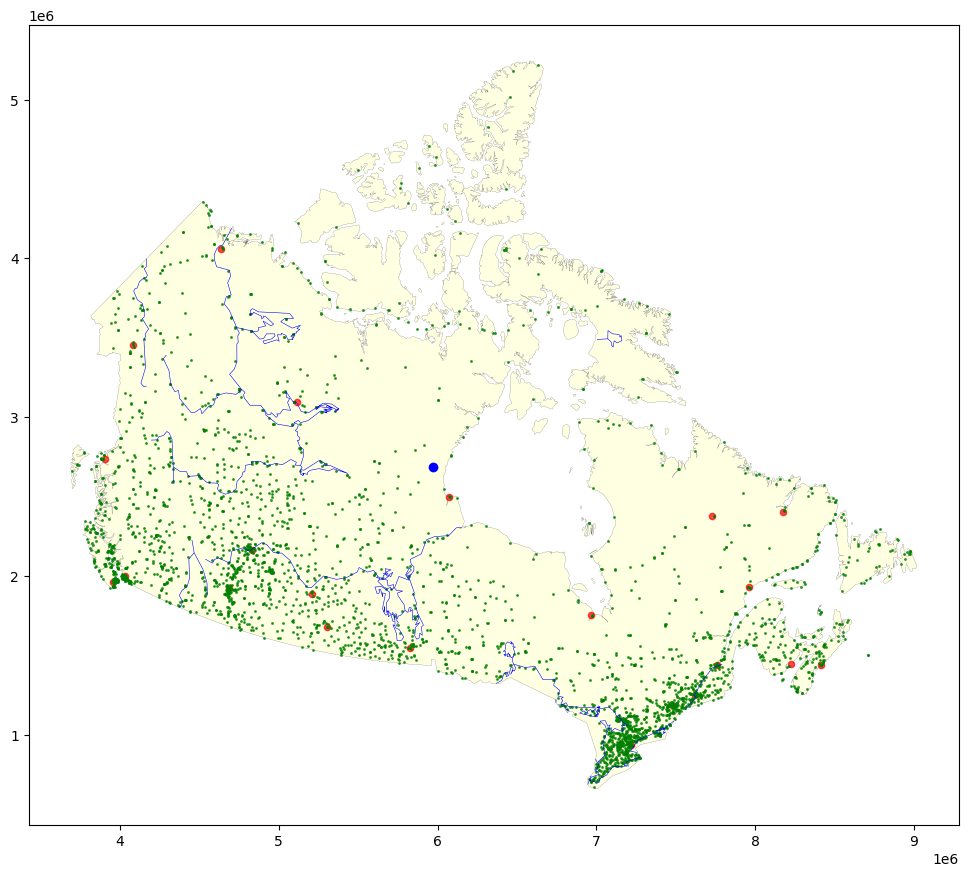

In [ ]:
baseCanada= canada_3348.plot(facecolor="#ffffe2",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers_canada_3348.plot(edgecolor='blue', linewidth=0.4,
            ax=baseCanada)
cities_canada_3348.plot(marker='.', color='red', markersize=80,alpha=0.7,
            ax=baseCanada)
canada_3348.centroid.plot(color='blue',ax=baseCanada)
canadaAirports_3348.plot(marker='.', color='green', markersize=5,alpha=0.7,
            ax=baseCanada)

<a class="anchor" id="11"></a>

## Formating Geoseries projections



You know **brazil_5641** is a multipolygon:

In [ ]:
brazil_5641

COUNTRY                                           geometry
29  Brazil  MULTIPOLYGON (((1926257.542 8894978.397, 19262...

Sometime, you just need the border (lines):

In [ ]:
brazil_5641.boundary

29    MULTILINESTRING ((1926257.542 8894978.397, 192...
dtype: geometry

<Axes: >

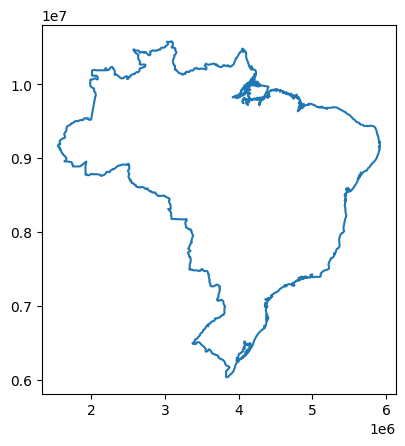

In [ ]:
# This is just the borderline
brazil_5641.boundary.plot()

Always check the data type:

In [ ]:
# does 'boundary' return a GDF?
type(brazil_5641.boundary)        #boundary es un geoseries

geopandas.geoseries.GeoSeries

Some operations in geopandas require GDF or GS. If you need a GDF instead of a GS:

In [ ]:
# converting into GDF
brazil_5641.boundary.to_frame()

0
29  MULTILINESTRING ((1926257.542 8894978.397, 192...

In [ ]:
brazil_5641.boundary.to_frame().info()    #ahora sí es un geodataframe

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 29 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


Notice you get a very simple GDF, and you may want to add some information:

In [ ]:
# conversion
brazil_border=brazil_5641.boundary.to_frame()   #brazil_border es GDF

# new column (optional)
brazil_border['name']='Brazil'

# renaming the geometry column
brazil_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
brazil_border = brazil_border.set_geometry("geometry")

# verifying:
brazil_border.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
brazil_border

geometry    name
29  MULTILINESTRING ((1926257.542 8894978.397, 192...  Brazil

You can add this GDF as a layer.

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

<Axes: >

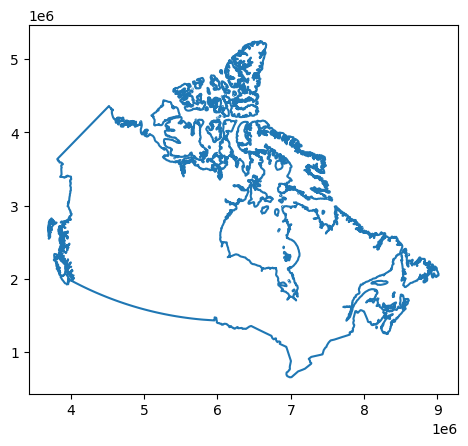

In [ ]:
canada_3348.boundary.plot()

In [ ]:
canada_3348.boundary.to_frame()

0
35  MULTILINESTRING ((6381348.825 4528727.912, 638...

In [ ]:
# se hace la conversion
canada_border=canada_3348.boundary.to_frame()

canada_border['name']='Canada'
canada_border.rename(columns={0:'geometry'},inplace=True)
canada_border = canada_border.set_geometry("geometry")

canada_border.crs

<Projected CRS: EPSG:3348>
Name: NAD83(CSRS) / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
canada_border

geometry    name
35  MULTILINESTRING ((6381348.825 4528727.912, 638...  Canada

In [ ]:
#se agrega el border como capa
canada_border.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='border', driver="GPKG")

<a class="anchor" id="12"></a>

## Maps Lacking CRS information

Reprojecting seems a simple process, but you might find some interesting cases.

Download the compressed file "Brazil_subnational". Unzip or decompress that files. Move the decompressed folder into your current _maps_ folder.

Let's read the maps on _states_(adm1) and _municipalities_ (adm2):

In [ ]:
brazil_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
brazil_municipalities=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

They are maps, for sure:

In [ ]:
type(brazil_states), type(brazil_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [ ]:
brazil_states.geometry.head()

0    MULTIPOLYGON (((-68.87747 -11.01987, -68.88027...
1    POLYGON ((-35.46317 -8.82467, -35.46457 -8.828...
2    MULTIPOLYGON (((-50.46147 2.11133, -50.45627 2...
3    MULTIPOLYGON (((-58.49367 -0.84197, -58.48917 ...
4    MULTIPOLYGON (((-38.70687 -17.96447, -38.70867...
Name: geometry, dtype: geometry

In [ ]:
brazil_municipalities.geometry.head()

0    POLYGON ((-62.0495 -11.86731, -62.04559 -11.86...
1    POLYGON ((-62.42279 -9.80481, -62.42688 -9.806...
2    POLYGON ((-60.37329 -13.40887, -60.37323 -13.4...
3    POLYGON ((-61.00061 -10.99219, -61.00061 -11.0...
4    POLYGON ((-61.20642 -13.08759, -61.20282 -13.0...
Name: geometry, dtype: geometry

But, notice this:

In [ ]:
brazil_states.crs, brazil_municipalities.crs    # WHY?!?!?!?!?!?!?

(None, None)

They do not have crs information, however they can be plotted:

In [ ]:
# import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

# brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
# brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


Since we are using the crs 5641 for Brazil, the initial strategy could be to set the CRS with the right projection :

In [ ]:
## uncomment this to see the error message
# brazil_states.to_crs(5641)

Python says _"Please set a crs on the object first"_. This would mean to know the actual projection, of the geometry:

From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [ ]:
# set as unprojected
brazil_states.crs = "EPSG:4326"                                       # datos no proyectados
brazil_municipalities.crs = "EPSG:4326"

Now, we can reproject:

In [ ]:
brazil_states=brazil_states.to_crs(5641)
brazil_municipalities=brazil_municipalities.to_crs(5641)

In [ ]:
brazil_states.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='states', driver="GPKG")
brazil_municipalities.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='municipalities', driver="GPKG")

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

In [ ]:
canadaPais=gpd.read_file(os.path.join("maps","canada","gadm41_CAN_0.shp")) #pais
canadaProvincias=gpd.read_file(os.path.join("maps","canada","gadm41_CAN_1.shp")) #provincias y territorios
canadaMunicipios=gpd.read_file(os.path.join("maps","canada","gadm41_CAN_2.shp")) #mas pequeños
#'Census Division', 'Regional District', 'Region', 'County',
#'District', 'Regional Municipality', 'Water body', 'United County',
#'District Municipality', 'United Counties',
#'Regional County Municipality',
#'MunicipalitÃ© RÃ©gionale de ComtÃ©'                                     #sera necesario limpiar este nombre?????
canadaMenor=gpd.read_file(os.path.join("maps","canada","gadm41_CAN_3.shp"))
#Town, village, etc etc

In [ ]:
import matplotlib.pyplot as plt

# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False, sharey=False, figsize=(12,12))

# canadaProvincias.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
# canadaMunicipios.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)
# canadaMenor.plot(ax=ax3, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [ ]:
canadaProvincias.crs      #CRS definido, pero falta proyectarlo

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
canadaMunicipios.crs    #CRS NO definido

In [ ]:
canadaMenor.crs   #CRS definido, pero falta proyectarlo

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
canadaMunicipios.crs = "EPSG:4326"   #se coloca CRS

In [ ]:
# reproyectamos los 3 GDF
canadaProvincias=canadaProvincias.to_crs(3348)                  # Strings tienen caracteres no alfanumericos pero python lo procesa bien
canadaMunicipios=canadaMunicipios.to_crs(3348)                  # strings tienen no alfanumericos, pero esta todo un asco OJOJOJOJOJOJOJOJOJOJOJOJOJOJOJOJOJOJO
canadaMenor=canadaMenor.to_crs(3348)                            # Strings tienen caracteres no alfanumericos pero python lo procesa bien

In [ ]:
canadaProvincias.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='provincias', driver="GPKG")
canadaMunicipios.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='municipios', driver="GPKG")
canadaMenor.to_file(os.path.join("maps","canadaMaps_3348.gpkg"), layer='menor', driver="GPKG")

## Geo Merging

The countries map has no interesting information beyond the geometry.

In [ ]:
countries.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

Let add some information to each country:

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

Country                            Officialstatename  \
0          AFGHANISTAN          The Islamic Republic of Afghanistan   
1              ALBANIA                      The Republic of Albania   
2              ALGERIA  The People's Democratic Republic of Algeria   
3               ANGOLA                       The Republic of Angola   
4  ANTIGUA AND BARBUDA                          Antigua and Barbuda   

  InternetccTLD iso2 iso3  fragility          co2  \
0           .af   AF  AFG      105.0    7893000.0   
1           .al   AL  ALB       58.9    3794000.0   
2           .dz   DZ  DZA       75.4  151633000.0   
3           .ao   AO  AGO       87.8   19362000.0   
4           .ag   AG  ATG       54.4     729000.0   

                              region  ForestRev_gdp  
0                         SOUTH ASIA           0.20  
1                             EUROPE           0.18  
2                             AFRICA           0.10  
3                             AFRICA           0.36  
4  CENTRAL AMERICA AND THE CARIBBEAN           0.00

We want to add the _fragilityCia_ data into the map. That is the merging process.
For that, we need a common column. The _Country_ column is the option.

In [ ]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [ ]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [ ]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

## Fuzzy merging

Let's find similar names:

In [ ]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.3 MB/s eta 0:00:00


In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('DOMINICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),


In [ ]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('NORTHERN MARIANA ISLANDS (THE)', ('NORTHERN MARIANA ISLANDS (US)', 91)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, 

Preparing a _dict_ of changes:

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia) if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED 

Making changes and updating:

In [ ]:
#antes, se comparo cada valor de fragilCia con cada valor de Map, por tanto, se procede a cambiar cada valor parecido de fragilCia por el correspondiente en Maps

fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]        # como se conocio de antemano que estos paises eran los que se parecian en algo???????
                                                                # cheats?

COUNTRY                                           geometry
17      BOTSWANA  POLYGON ((26.40114 -24.63189, 26.38996 -24.627...
120  NORTH KOREA  POLYGON ((125.62979 38.65694, 125.51721 38.717...
122  SOUTH KOREA  MULTIPOLYGON (((126.86922 36.0606, 126.8591 36...
126         LAOS  POLYGON ((104.257 17.88763, 104.23943 17.93722...
243    SWAZILAND  POLYGON ((30.89944 -26.77195, 30.88028 -26.793...

In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [ ]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')       #ojo que se hace inner merge

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            170 non-null    object  
 1   geometry           170 non-null    geometry
 2   Officialstatename  170 non-null    object  
 3   InternetccTLD      170 non-null    object  
 4   iso2               169 non-null    object  
 5   iso3               170 non-null    object  
 6   fragility          170 non-null    float64 
 7   co2                170 non-null    float64 
 8   region             170 non-null    object  
 9   ForestRev_gdp      170 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 13.4+ KB


# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames])

variable   value
0        fragility   54.40
1        fragility  105.00
2        fragility   75.40
3        fragility   73.20
4        fragility   58.90
..             ...     ...
505  ForestRev_gdp    4.45
506  ForestRev_gdp    1.61
507  ForestRev_gdp    2.65
508  ForestRev_gdp    0.39
509  ForestRev_gdp    0.13

[510 rows x 2 columns]

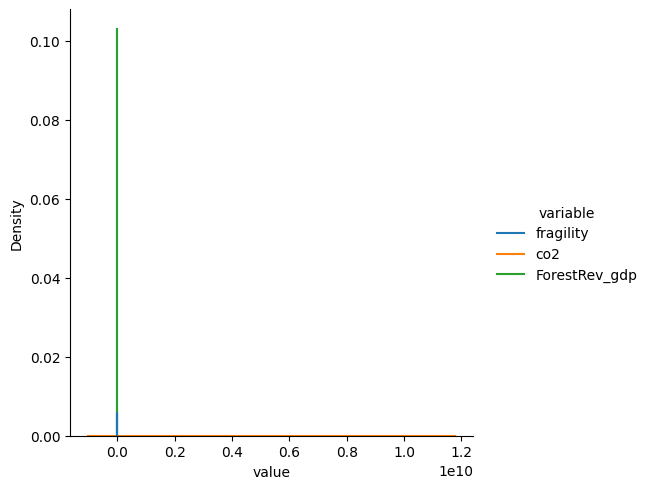

In [ ]:
import seaborn as
import matplotlib.pyplot as plt

seaborn.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
!pip install -U scikit-learn

* **StandardScaler**:

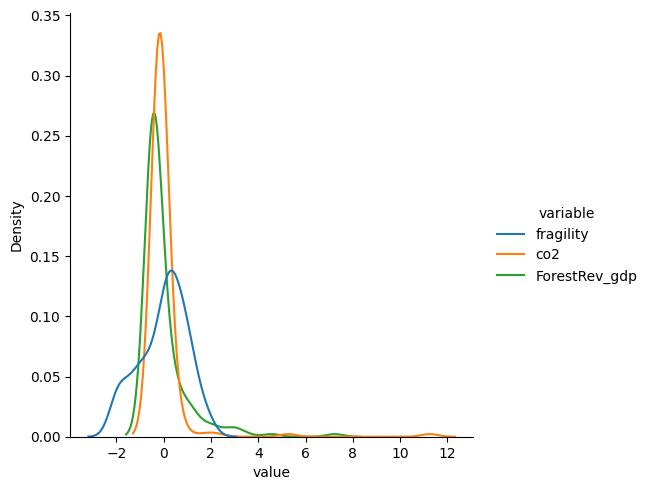

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
seaborn.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

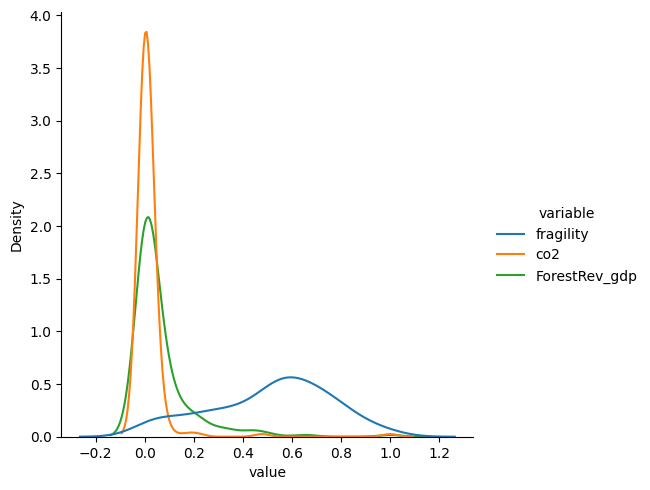

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

seaborn.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

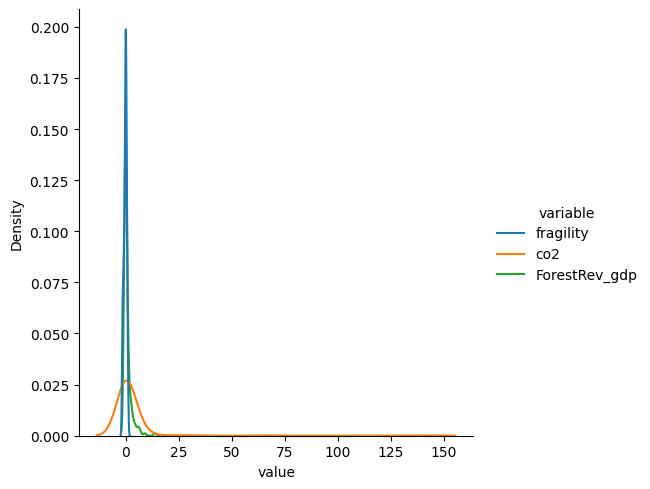

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

seaborn.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

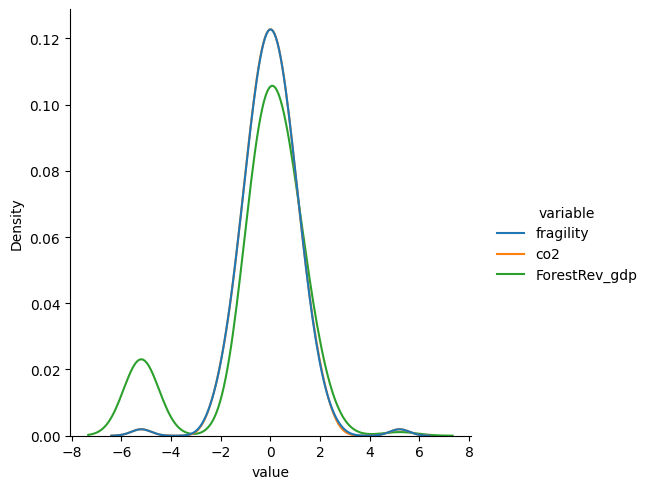

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

seaborn.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]    #se usa el rescaling QuantileTransformer
                                                    #y se agrega una columna: fragility_QT
                                                    #QtScaled_data[:,0] representa la columna de
                                                    #fragility

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 11.6 MB/s eta 0:00:00


Let me discretize **fragility_Qt**:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [ ]:
theMapAndData.fragility_Qt

0     -0.559624
1      1.824703
2      0.281088
3      0.209853
4     -0.451880
         ...   
165    0.829768
166    1.657274
167    2.588086
168   -0.025581
169    0.816523
Name: fragility_Qt, Length: 170, dtype: float64

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

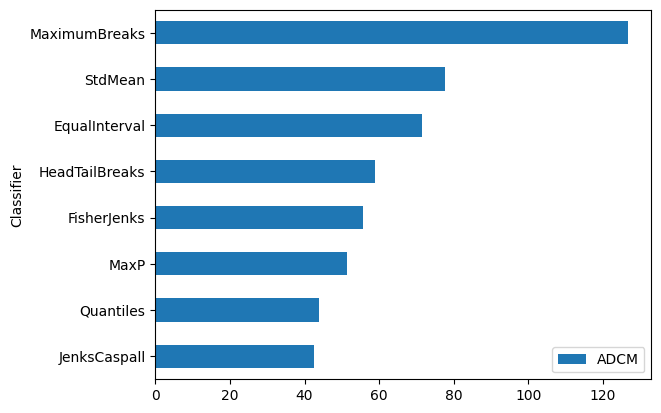

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb      #ojo que aqui traslada solo la info importante de jc5 al GDF: los labels

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

fragility_Qt  fragility_Qt_jc5
0     -0.559624                 1
1      1.824703                 4
2      0.281088                 2
3      0.209853                 2
4     -0.451880                 1

Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

fragility_Qt_jc5 fragility_Qt
                           mean
0                0    -1.613560
1                1    -0.609374
2                2     0.023169
3                3     0.664470
4                4     1.685858

We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

fragility_Qt  fragility_Qt_jc5 fragility_Qt_jc5_cat
0      -0.559624                 1               1_Good
1       1.824703                 4               4_Poor
2       0.281088                 2             2_Middle
3       0.209853                 2             2_Middle
4      -0.451880                 1               1_Good
5      -0.203997                 2             2_Middle
6       0.942215                 3                3_Bad
7      -0.796394                 1               1_Good
8      -1.959964                 0              0_Great
9      -1.433252                 0              0_Great
10     -0.317634                 1               1_Good
11     -0.721576                 1               1_Good
12     -0.439621                 1               1_Good
13     -1.305351                 0              0_Great
14     -0.699212                 1               1_Good
15      0.930601                 3                3_Bad
16     -0.342088                 1               1_Good
17      0.066794                 2             2_Middle
18      0.169089                 2             2_Middle
19      0.231391                 2             2_Middle

We are ready for a choropleth:

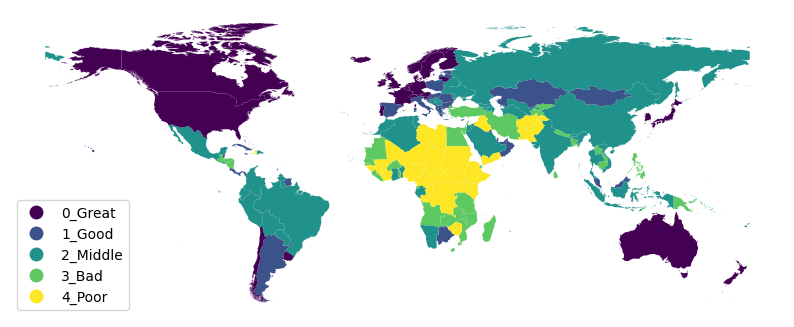

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

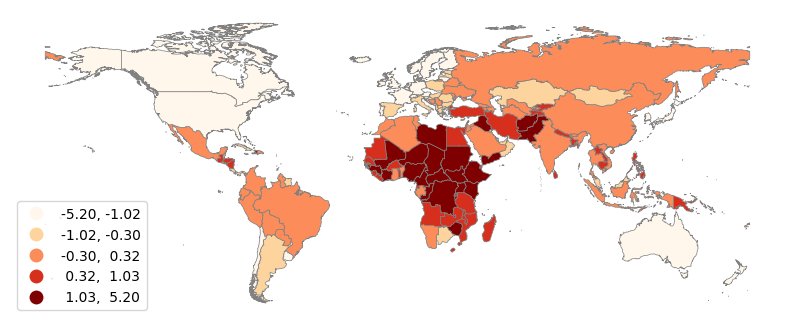

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()           #removes los ejes X y Y

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>

In [ ]:
theMapAndData['co2_Qt']=QtScaled_data[:,1]
theMapAndData['forestRev_gdp_Qt']=QtScaled_data[:,2]
#luego importa numpy y numba

Para co2_Qt

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar1=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5_1 = mapclassify.EqualInterval(theVar1, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd_1 = mapclassify.StdMean(theVar1)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5_1=mapclassify.Quantiles(theVar1,k=K)

# based on similarity, good for multimodal data
mb5_1 = mapclassify.MaximumBreaks(theVar1, k=K)
# based on similarity, good for skewed data
ht_1 = mapclassify.HeadTailBreaks(theVar1) # no K needed
# based on similarity, optimizer
fj5_1 = mapclassify.FisherJenks(theVar1, k=K)
# based on similarity, optimizer
jc5_1 = mapclassify.JenksCaspall(theVar1, k=K)
# based on similarity, optimizer
mp5_1 = mapclassify.MaxP(theVar1, k=K)

In [ ]:
class5_1 = ei5_1,msd_1, q5_1,mb5_1,  ht_1, fj5_1, jc5_1, mp5_1
# Collect ADCM for each classifier
fits_1 = np.array([ c.adcm for c in class5_1])
# Convert ADCM scores to a DataFrame
adcms_1 = pd.DataFrame(fits_1)
# Add classifier names
adcms_1['classifier'] = [c.name for c in class5_1]
# Add column names to the ADCM
adcms_1.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

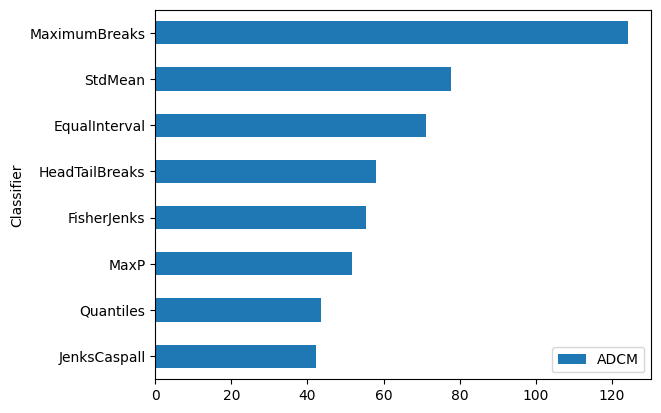

In [ ]:
adcms_1.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
# Nos quedamo con el que ofrece menor ADCM
theMapAndData['co2_Qt_jc5'] = jc5_1.yb

In [ ]:
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

co2_Qt  co2_Qt_jc5
0 -1.392136           0
1 -0.286256           2
2  0.901777           3
3  0.284856           2
4 -0.725128           1

In [ ]:
newLabelsForLevels_1={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels_1)

In [ ]:
theMapAndData[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head()

co2_Qt  co2_Qt_jc5 co2_Qt_jc5_cat
0 -1.392136           0        0_Great
1 -0.286256           2       2_Middle
2  0.901777           3          3_Bad
3  0.284856           2       2_Middle
4 -0.725128           1         1_Good

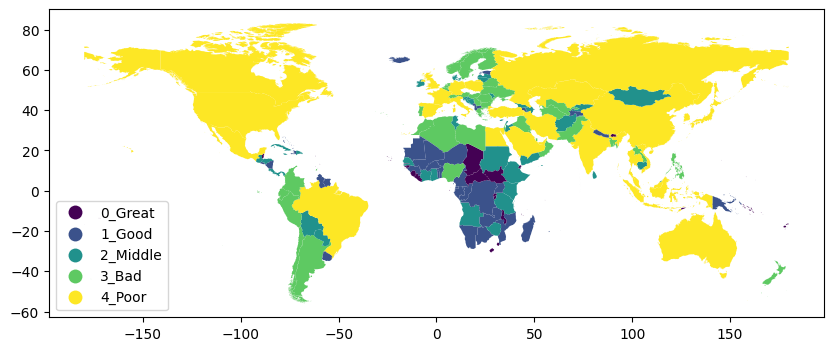

In [ ]:
import matplotlib.pyplot as plt

f, ax_1 = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax_1
       )

ax.set_axis_off()

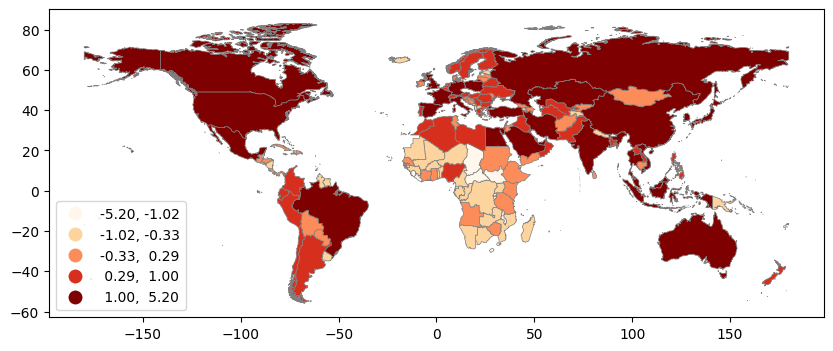

In [ ]:
import matplotlib.pyplot as plt

f, ax_1 = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax_1
       )

ax.set_axis_off()

Para forestRev_gdp_Qt

In [ ]:
np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar2=theMapAndData.forestRev_gdp_Qt
# same interval width, easy interpretation
ei5_2 = mapclassify.EqualInterval(theVar2, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd_2 = mapclassify.StdMean(theVar2)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5_2=mapclassify.Quantiles(theVar2,k=K)

# based on similarity, good for multimodal data
mb5_2 = mapclassify.MaximumBreaks(theVar2, k=K)
# based on similarity, good for skewed data
ht_2 = mapclassify.HeadTailBreaks(theVar2) # no K needed
# based on similarity, optimizer
fj5_2 = mapclassify.FisherJenks(theVar2, k=K)
# based on similarity, optimizer
jc5_2 = mapclassify.JenksCaspall(theVar2, k=K)
# based on similarity, optimizer
mp5_2 = mapclassify.MaxP(theVar2, k=K)

In [ ]:
class5_2 = ei5_2,msd_2, q5_2,mb5_2,  ht_2, fj5_2, jc5_2, mp5_2
# Collect ADCM for each classifier
fits_2 = np.array([ c.adcm for c in class5_2])
# Convert ADCM scores to a DataFrame
adcms_2 = pd.DataFrame(fits_2)
# Add classifier names
adcms_2['classifier'] = [c.name for c in class5_2]
# Add column names to the ADCM
adcms_2.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

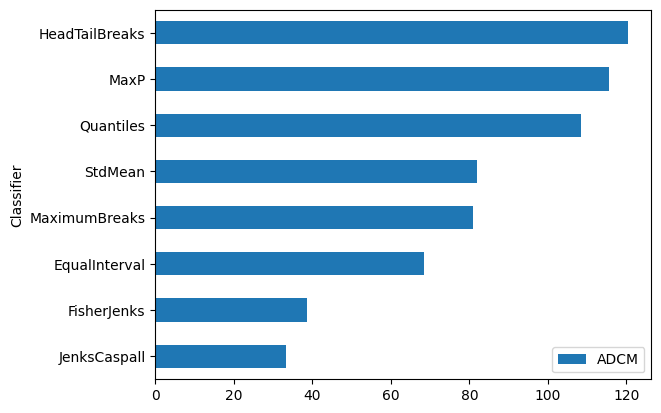

In [ ]:
adcms_2.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
# nos quedamos con la discretizacion que nos da el menor ADCM
theMapAndData['forestRev_gdp_Qt_jc5'] = jc5_2.yb

In [ ]:
theMapAndData[['forestRev_gdp_Qt','forestRev_gdp_Qt_jc5']].head()

forestRev_gdp_Qt  forestRev_gdp_Qt_jc5
0         -5.199338                     0
1         -0.076809                     2
2         -0.338888                     1
3         -0.791639                     1
4         -0.102491                     2

Se agregan nuevas columnas que funcionará como leyenda en el plot.

In [ ]:
newLabelsForLevels_2={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
theMapAndData['forestRev_gdp_Qt_jc5_cat']=theMapAndData.loc[:,'forestRev_gdp_Qt_jc5'].replace(newLabelsForLevels_2)

theMapAndData[['forestRev_gdp_Qt','forestRev_gdp_Qt_jc5','forestRev_gdp_Qt_jc5_cat']].head()

forestRev_gdp_Qt  forestRev_gdp_Qt_jc5 forestRev_gdp_Qt_jc5_cat
0         -5.199338                     0                  0_Great
1         -0.076809                     2                 2_Middle
2         -0.338888                     1                   1_Good
3         -0.791639                     1                   1_Good
4         -0.102491                     2                 2_Middle

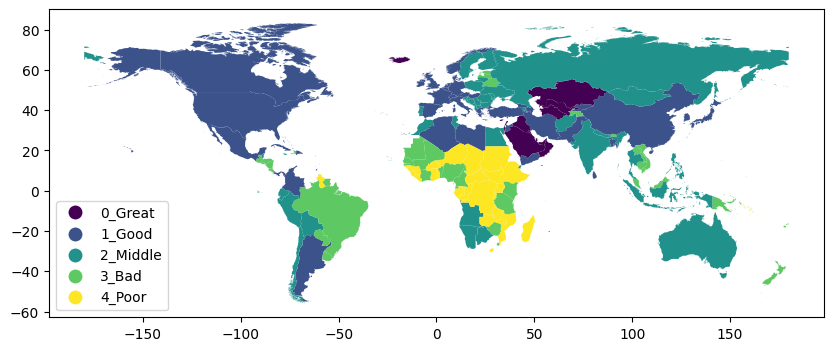

In [ ]:
import matplotlib.pyplot as plt

f, ax_2 = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='forestRev_gdp_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax_2
       )

ax.set_axis_off()

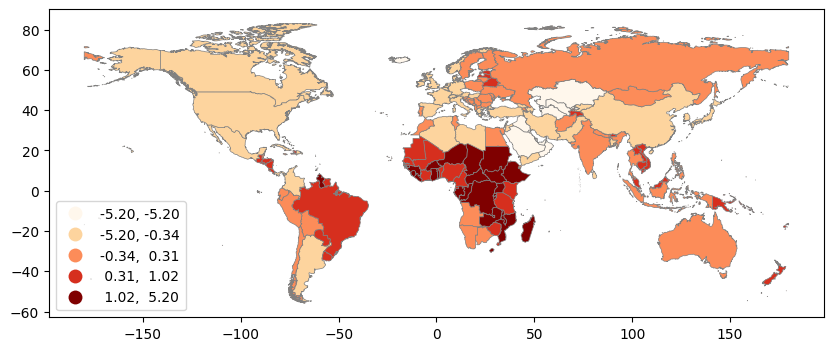

In [ ]:
import matplotlib.pyplot as plt

f, ax_2 = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='forestRev_gdp_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax_2
       )

ax.set_axis_off()

Se procede a hacer merge a ingresar otra variable

In [ ]:
import os
#se ingresa la variable energy de la PC3, el cual indica el consumo de energía per capita
energyConsumption=pd.read_csv(os.path.join("maps","Energy consumption per capita.csv"))
energyConsumption.head()

name                  slug   Btu/person  \
0                 Qatar                 qatar  814,308,000   
1             Singapore             singapore  643,259,000   
2               Bahrain               bahrain  554,202,000   
3  United Arab Emirates  united-arab-emirates  450,432,000   
4                Brunei                brunei  403,365,000   

   date_of_information  ranking                   region  
0                 2023        1              Middle East  
1                 2023        2  East and Southeast Asia  
2                 2023        3              Middle East  
3                 2023        4              Middle East  
4                 2023        5  East and Southeast Asia

In [ ]:
#se quiere tratar de hacer inner merge de este DF al GDF theMapandData
theMapAndData.head(3)

COUNTRY                                           geometry  \
0  ANTIGUA AND BARBUDA  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...   
1          AFGHANISTAN  POLYGON ((61.27656 35.60725, 61.29638 35.62853...   
2              ALGERIA  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...   

                             Officialstatename InternetccTLD iso2 iso3  \
0                          Antigua and Barbuda           .ag   AG  ATG   
1          The Islamic Republic of Afghanistan           .af   AF  AFG   
2  The People's Democratic Republic of Algeria           .dz   DZ  DZA   

   fragility          co2                             region  ForestRev_gdp  \
0       54.4     729000.0  CENTRAL AMERICA AND THE CARIBBEAN            0.0   
1      105.0    7893000.0                         SOUTH ASIA            0.2   
2       75.4  151633000.0                             AFRICA            0.1   

   fragility_Qt  fragility_Qt_jc5 fragility_Qt_jc5_cat    co2_Qt  \
0     -0.559624                 1               1_Good -1.392136   
1      1.824703                 4               4_Poor -0.286256   
2      0.281088                 2             2_Middle  0.901777   

   forestRev_gdp_Qt  co2_Qt_jc5 co2_Qt_jc5_cat  forestRev_gdp_Qt_jc5  \
0         -5.199338           0        0_Great                     0   
1         -0.076809           2       2_Middle                     2   
2         -0.338888           3          3_Bad                     1   

  forestRev_gdp_Qt_jc5_cat  
0                  0_Great  
1                 2_Middle  
2                   1_Good

In [ ]:
# se procede con la limpieza y formateo del DF energy para luego hacerle merge con el GDF
energyConsumption=energyConsumption.drop(columns=["slug","ranking","date_of_information","region"])
energyConsumption.head()

name   Btu/person
0                 Qatar  814,308,000
1             Singapore  643,259,000
2               Bahrain  554,202,000
3  United Arab Emirates  450,432,000
4                Brunei  403,365,000

In [ ]:
newNamesEnergyConsumption=["COUNTRY","Energy_consumption_per_capita_BtuPerPerson"]
energyConsumption.columns=newNamesEnergyConsumption
energyConsumption.head()

COUNTRY Energy_consumption_per_capita_BtuPerPerson
0                 Qatar                                814,308,000
1             Singapore                                643,259,000
2               Bahrain                                554,202,000
3  United Arab Emirates                                450,432,000
4                Brunei                                403,365,000

In [ ]:
#para eliminar cualquier leading o trailing space en la columna COUNTRY
energyConsumption.iloc[:,0]=energyConsumption["COUNTRY"].str.strip().to_list()

In [ ]:
energyConsumption['COUNTRY']=energyConsumption.COUNTRY.str.upper()

In [ ]:
energyConsumption.head()

COUNTRY Energy_consumption_per_capita_BtuPerPerson
0                 QATAR                                814,308,000
1             SINGAPORE                                643,259,000
2               BAHRAIN                                554,202,000
3  UNITED ARAB EMIRATES                                450,432,000
4                BRUNEI                                403,365,000

In [ ]:
#se crea funcion para eliminar cualquier valor diferente a un digito
import re
charToNum=lambda xString:re.sub("[^0-9.]","",xString)

In [ ]:
#se aplica la funcion a energyConsumption
energyConsumption.iloc[:,1]=energyConsumption.iloc[:,1].map(charToNum)
energyConsumption['Energy_consumption_per_capita_BtuPerPerson']=pd.to_numeric(energyConsumption.Energy_consumption_per_capita_BtuPerPerson)

In [ ]:
energyConsumption.info()          #todo bien

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   COUNTRY                                     195 non-null    object
 1   Energy_consumption_per_capita_BtuPerPerson  195 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
#el DF está listo para hacerle merge, pero habrá que ver si es necesario fuzzy merge o no

In [ ]:
set(theMapAndData.COUNTRY)^set(energyConsumption.COUNTRY)

{'AMERICAN SAMOA',
 'ARUBA',
 'BAHAMAS',
 'BAHAMAS, THE',
 'BERMUDA',
 'BRITISH VIRGIN ISLANDS',
 'BURMA',
 'CABO VERDE',
 'CAPE VERDE',
 'CAYMAN ISLANDS',
 'CONGO',
 'CONGO, DEMOCRATIC REPUBLIC OF THE',
 'CONGO, REPUBLIC OF THE',
 "COTE D'IVOIRE",
 'CZECHIA',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'EAST TIMOR',
 'ERITREA',
 'FEDERATED STATES OF MICRONESIA',
 'GAMBIA',
 'GAMBIA, THE',
 'GAZA STRIP',
 'GUAM',
 'HONG KONG',
 'ICELAND',
 'IVORY COAST',
 'KIRIBATI',
 'KOREA (THE REPUBLIC OF)',
 'KOREA, NORTH',
 'KOREA, SOUTH',
 'KOSOVO',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'LAOS',
 'MACAU',
 'MACEDONIA',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (US)',
 'PUERTO RICO',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'SAMOA',
 'SLOVAKIA',
 'SOMALIA',
 'SOUTH AFRICA',
 'SYRIA',
 'TAIWAN',
 'TIMOR-LESTE',
 'TONGA',
 'TRINIDAD AND TOBAGO',
 'TURKEY',
 'TURKEY (TURKIYE)',
 'VANUATU',
 'VENEZUELA',
 'WEST BANK',
 'WESTERN SAMOA'}

In [ ]:
#a simple vista, se observa que sí es necesario el fuzzy merge
onlyMapa=set(theMapAndData.COUNTRY)-set(energyConsumption.COUNTRY)
onlyEnergy=set(energyConsumption.COUNTRY)-set(theMapAndData.COUNTRY)

In [ ]:
!pip install thefuzz
from thefuzz import process as fz

In [ ]:
[(c,fz.extractOne(c,onlyMapa)) for c in sorted(onlyEnergy)]

[('AMERICAN SAMOA', ('WESTERN SAMOA', 67)),
 ('ARUBA', ('GAMBIA', 55)),
 ('BAHAMAS, THE', ('BAHAMAS', 90)),
 ('BERMUDA', ('NORTHERN MARIANA ISLANDS (US)', 51)),
 ('BRITISH VIRGIN ISLANDS', ('ICELAND', 64)),
 ('BURMA', ('NORTHERN MARIANA ISLANDS (US)', 54)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CAYMAN ISLANDS', ('NORTHERN MARIANA ISLANDS (US)', 86)),
 ('CONGO, DEMOCRATIC REPUBLIC OF THE',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO, REPUBLIC OF THE', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CZECHIA', ('MACEDONIA', 50)),
 ('DOMINICA', ('MACEDONIA', 59)),
 ('ERITREA', ('FEDERATED STATES OF MICRONESIA', 51)),
 ('GAMBIA, THE', ('GAMBIA', 90)),
 ('GAZA STRIP', ('GAMBIA', 54)),
 ('GUAM', ('GAMBIA', 77)),
 ('HONG KONG', ('CONGO', 68)),
 ('KIRIBATI', ('KOREA (THE REPUBLIC OF)', 45)),
 ('KOREA, NORTH', ('KOREA (THE REPUBLIC OF)', 86)),
 ('KOREA, SOUTH', ('KOREA (THE REPUBLIC OF)', 86)),
 ('KOSOVO', ('KOREA (THE REPUBLIC OF)', 45)),
 ('LA

In [ ]:
[(c, process.extractOne(c,onlyMapa)) for c in sorted(onlyEnergy) if process.extractOne(c,onlyMapa)[1]>=90]

[('BAHAMAS, THE', ('BAHAMAS', 90)),
 ('CONGO, DEMOCRATIC REPUBLIC OF THE',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO, REPUBLIC OF THE', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('GAMBIA, THE', ('GAMBIA', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('TURKEY (TURKIYE)', ('TURKEY', 90))]

In [ ]:
try1={country: process.extractOne(country,onlyMapa)[0] for country in sorted(onlyEnergy) if process.extractOne(country,onlyMapa)[1]>=90}
try1

{'BAHAMAS, THE': 'BAHAMAS',
 'CONGO, DEMOCRATIC REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO, REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'GAMBIA, THE': 'GAMBIA',
 'NORTH MACEDONIA': 'MACEDONIA',
 'SAMOA': 'WESTERN SAMOA',
 'TURKEY (TURKIYE)': 'TURKEY'}

In [ ]:
del try1['CONGO, REPUBLIC OF THE']

In [ ]:
try1

{'BAHAMAS, THE': 'BAHAMAS',
 'CONGO, DEMOCRATIC REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'GAMBIA, THE': 'GAMBIA',
 'NORTH MACEDONIA': 'MACEDONIA',
 'SAMOA': 'WESTERN SAMOA',
 'TURKEY (TURKIYE)': 'TURKEY'}

In [ ]:
energyConsumption.replace(to_replace={'COUNTRY':try1},inplace=True)

# updating
onlyEnergy=set(energyConsumption.COUNTRY)- set(theMapAndData.COUNTRY)
onlyMapa=set(theMapAndData.COUNTRY)- set(energyConsumption.COUNTRY)
# new matches
[(c, process.extractOne(c,onlyMapa)) for c in sorted(onlyEnergy)]

[('AMERICAN SAMOA', ('ICELAND', 51)),
 ('ARUBA', ('KOREA (THE REPUBLIC OF)', 54)),
 ('BERMUDA', ('NORTHERN MARIANA ISLANDS (US)', 51)),
 ('BRITISH VIRGIN ISLANDS', ('ICELAND', 64)),
 ('BURMA', ('NORTHERN MARIANA ISLANDS (US)', 54)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CAYMAN ISLANDS', ('NORTHERN MARIANA ISLANDS (US)', 86)),
 ('CONGO, REPUBLIC OF THE', ('CONGO', 90)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('CZECHIA', ('FEDERATED STATES OF MICRONESIA', 49)),
 ('DOMINICA', ('FEDERATED STATES OF MICRONESIA', 51)),
 ('ERITREA', ('FEDERATED STATES OF MICRONESIA', 51)),
 ('GAZA STRIP', ('KOREA (THE REPUBLIC OF)', 45)),
 ('GUAM', ('FEDERATED STATES OF MICRONESIA', 36)),
 ('HONG KONG', ('CONGO', 68)),
 ('KIRIBATI', ('KOREA (THE REPUBLIC OF)', 45)),
 ('KOREA, NORTH', ('KOREA (THE REPUBLIC OF)', 86)),
 ('KOREA, SOUTH', ('KOREA (THE REPUBLIC OF)', 86)),
 ('KOSOVO', ('KOREA (THE REPUBLIC OF)', 45)),
 ('LAOS', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU', ("LAO PEOPLE'S DEMOCRA

In [ ]:
try2:{
    'CABO VERDE':'CAPE VERDE',
    "COTE D'IVOIRE":'IVORY COAST',
    'KOREA, SOUTH':'KOREA (THE REPUBLIC OF)',
    "LAOS":"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"
}

In [ ]:
energyConsumption.replace(to_replace={'COUNTRY':try2},inplace=True)

# updating
onlyEnergy=set(energyConsumption.COUNTRY)- set(theMapAndData.COUNTRY)
onlyMapa=set(theMapAndData.COUNTRY)- set(energyConsumption.COUNTRY)

In [ ]:
energyConsumption.loc[125,"COUNTRY"]="KOREA (THE REPUBLIC OF)"
energyConsumption.loc[109,"COUNTRY"]="LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"
energyConsumption.loc[154,"COUNTRY"]='IVORY COAST'

In [ ]:
onlyEnergy=set(energyConsumption.COUNTRY)- set(theMapAndData.COUNTRY)
onlyMapa=set(theMapAndData.COUNTRY)- set(energyConsumption.COUNTRY)

In [ ]:
onlyEnergy^onlyMapa       # se verifica que no hay hay paises con nombres similares, por lo que se puede proceder a hacer el innerg merge

{'AMERICAN SAMOA',
 'ARUBA',
 'BERMUDA',
 'BRITISH VIRGIN ISLANDS',
 'BURMA',
 'CAYMAN ISLANDS',
 'CONGO',
 'CONGO, REPUBLIC OF THE',
 'CZECHIA',
 'DOMINICA',
 'ERITREA',
 'FEDERATED STATES OF MICRONESIA',
 'GAZA STRIP',
 'GUAM',
 'HONG KONG',
 'ICELAND',
 'KIRIBATI',
 'KOREA, SOUTH',
 'KOSOVO',
 'MACAU',
 'NORTHERN MARIANA ISLANDS (US)',
 'PUERTO RICO',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'SLOVAKIA',
 'SOMALIA',
 'SOUTH AFRICA',
 'SYRIA',
 'TAIWAN',
 'TONGA',
 'TRINIDAD AND TOBAGO',
 'VANUATU',
 'VENEZUELA',
 'WEST BANK'}

In [ ]:
theMapAndDataNew=theMapAndData.merge(energyConsumption,on='COUNTRY')       #e hace inner merge

# theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# # here it is (new map):
# theMapAndData.info()
theMapAndDataNew

COUNTRY                                           geometry  \
0    ANTIGUA AND BARBUDA  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...   
1            AFGHANISTAN  POLYGON ((61.27656 35.60725, 61.29638 35.62853...   
2                ALGERIA  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...   
3             AZERBAIJAN  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...   
4                ALBANIA  POLYGON ((20.79192 40.43154, 20.78722 40.39472...   
..                   ...                                                ...   
160               ZAMBIA  POLYGON ((30.21302 -14.98172, 30.21917 -15.096...   
161             ZIMBABWE  POLYGON ((32.48888 -21.34445, 32.46541 -21.325...   
162          SOUTH SUDAN  POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...   
163            INDONESIA  MULTIPOLYGON (((123.21846 -10.80917, 123.19832...   
164           EAST TIMOR  MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...   

                               Officialstatename InternetccTLD iso2 iso3  \
0                            Antigua and Barbuda           .ag   AG  ATG   
1            The Islamic Republic of Afghanistan           .af   AF  AFG   
2    The People's Democratic Republic of Algeria           .dz   DZ  DZA   
3                     The Republic of Azerbaijan           .az   AZ  AZE   
4                        The Republic of Albania           .al   AL  ALB   
..                                           ...           ...  ...  ...   
160                       The Republic of Zambia           .zm   ZM  ZMB   
161                     The Republic of Zimbabwe           .zw   ZW  ZWE   
162                  The Republic of South Sudan           .ss   SS  SSD   
163                    The Republic of Indonesia           .id   ID  IDN   
164       The Democratic Republic of Timor-Leste           .tl   TL  TLS   

     fragility          co2                             region  ForestRev_gdp  \
0         54.4     729000.0  CENTRAL AMERICA AND THE CARIBBEAN           0.00   
1        105.0    7893000.0                         SOUTH ASIA           0.20   
2         75.4  151633000.0                             AFRICA           0.10   
3         73.2   35389000.0                        MIDDLE EAST           0.02   
4         58.9    3794000.0                             EUROPE           0.18   
..         ...          ...                                ...            ...   
160       85.7    6798000.0                             AFRICA           4.45   
161       99.5    7902000.0                             AFRICA           1.61   
162      112.2    1778000.0                             AFRICA           2.65   
163       70.4  563543000.0            EAST AND SOUTHEAST ASIA           0.39   
164       85.5     538000.0            EAST AND SOUTHEAST ASIA           0.13   

     fragility_Qt  fragility_Qt_jc5 fragility_Qt_jc5_cat    co2_Qt  \
0       -0.559624                 1               1_Good -1.392136   
1        1.824703                 4               4_Poor -0.286256   
2        0.281088                 2             2_Middle  0.901777   
3        0.209853                 2             2_Middle  0.284856   
4       -0.451880                 1               1_Good -0.725128   
..            ...               ...                  ...       ...   
160      0.829768                 3                3_Bad -0.451080   
161      1.657274                 4               4_Poor -0.280057   
162      2.588086                 4               4_Poor -1.021024   
163     -0.025581                 2             2_Middle  1.592560   
164      0.816523                 3                3_Bad -1.567751   

     forestRev_gdp_Qt  co2_Qt_jc5 co2_Qt_jc5_cat  forestRev_gdp_Qt_jc5  \
0           -5.199338           0        0_Great                     0   
1           -0.076809           2       2_Middle                     2   
2           -0.338888           3          3_Bad                     1   
3           -0.791639           2       2_Mid

In [ ]:
import pandas as pd
DataNames=["Energy_consumption_per_capita_BtuPerPerson"]
pd.melt(theMapAndDataNew[DataNames])

variable      value
0    Energy_consumption_per_capita_BtuPerPerson  110114000
1    Energy_consumption_per_capita_BtuPerPerson    3380000
2    Energy_consumption_per_capita_BtuPerPerson   61843000
3    Energy_consumption_per_capita_BtuPerPerson   66467000
4    Energy_consumption_per_capita_BtuPerPerson   27407000
..                                          ...        ...
160  Energy_consumption_per_capita_BtuPerPerson    8265000
161  Energy_consumption_per_capita_BtuPerPerson   10855000
162  Energy_consumption_per_capita_BtuPerPerson    2092000
163  Energy_consumption_per_capita_BtuPerPerson   37390000
164  Energy_consumption_per_capita_BtuPerPerson    6825000

[165 rows x 2 columns]

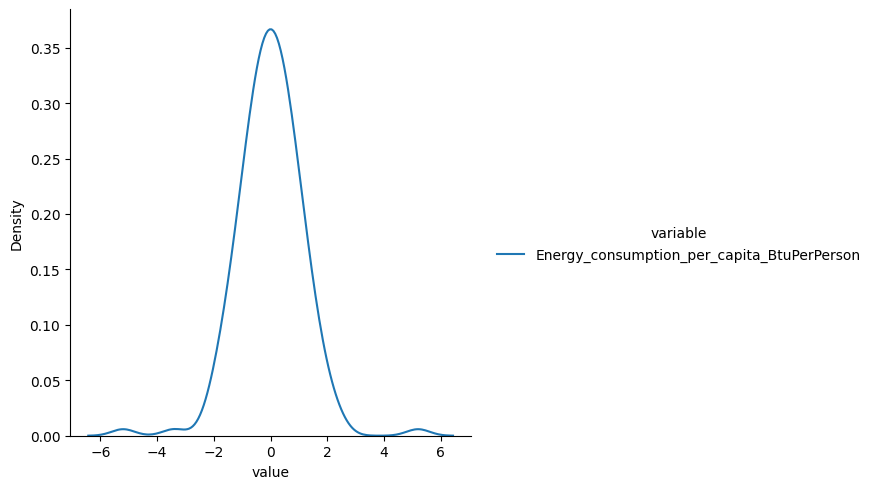

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndDataNew[DataNames])

seaborn.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [ ]:
theMapAndDataNew['energy_Qt']=QtScaled_data[:,0]

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar3=theMapAndDataNew.energy_Qt
# same interval width, easy interpretation
ei5_3 = mapclassify.EqualInterval(theVar3, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd_3 = mapclassify.StdMean(theVar3)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5_3=mapclassify.Quantiles(theVar3,k=K)

# based on similarity, good for multimodal data
mb5_3 = mapclassify.MaximumBreaks(theVar3, k=K)
# based on similarity, good for skewed data
ht_3 = mapclassify.HeadTailBreaks(theVar3) # no K needed
# based on similarity, optimizer
fj5_3 = mapclassify.FisherJenks(theVar3, k=K)
# based on similarity, optimizer
jc5_3 = mapclassify.JenksCaspall(theVar3, k=K)
# based on similarity, optimizer
mp5_3 = mapclassify.MaxP(theVar3, k=K)

In [ ]:
class5_3= ei5_3,msd_3, q5_3,mb5_3,  ht_3, fj5_3, jc5_3, mp5_3
# Collect ADCM for each classifier
fits_3 = np.array([ c.adcm for c in class5_3])
# Convert ADCM scores to a DataFrame
adcms_3 = pd.DataFrame(fits_3)
# Add classifier names
adcms_3['classifier'] = [c.name for c in class5_3]
# Add column names to the ADCM
adcms_3.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

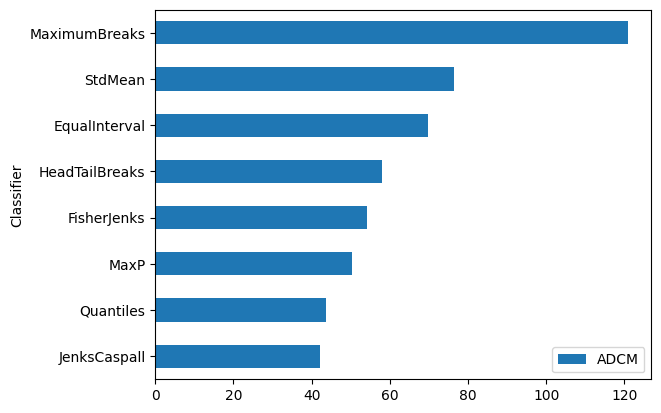

In [ ]:
adcms_3.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
# Nos quedamo con el que ofrece menor ADCM
theMapAndDataNew['energy_Qt_jc5'] = jc5_3.yb

In [ ]:
newLabelsForLevels_3={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}
theMapAndDataNew['energy_Qt_jc5_cat']=theMapAndDataNew.loc[:,'energy_Qt_jc5'].replace(newLabelsForLevels_3)

In [ ]:
theMapAndDataNew[['energy_Qt','energy_Qt_jc5','energy_Qt_jc5_cat']].head()

energy_Qt  energy_Qt_jc5 energy_Qt_jc5_cat
0   0.883673              3             3_Bad
1  -1.279661              0           0_Great
2   0.261813              2          2_Middle
3   0.341744              3             3_Bad
4  -0.259432              2          2_Middle

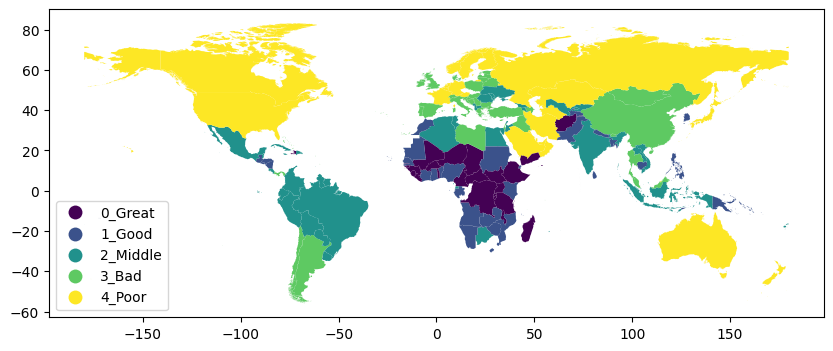

In [ ]:
import matplotlib.pyplot as plt

f, ax_3 = plt.subplots(1, figsize=(10, 10))
theMapAndDataNew.plot(column='energy_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax_3
       )

ax.set_axis_off()

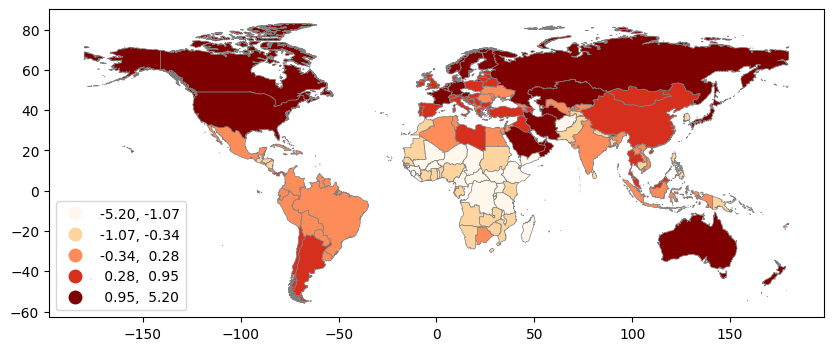

In [ ]:
import matplotlib.pyplot as plt

f, ax_4 = plt.subplots(1, figsize=(10, 10))
theMapAndDataNew.plot(column='energy_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax_4
       )

ax.set_axis_off()